In [8]:
import random

import matplotlib.pyplot as plt
import numpy as np

from training.kitti_data.augmenters import NoAugmenter
from training.kitti_data.patch_samplers import NoPatchSampler
from training.kitti_data.kitti_raw import KITTIRAWDataset

In [5]:
dataset = KITTIRAWDataset(
        NoAugmenter(),
        NoPatchSampler(),
        '/media/antonio/523f31c5-dc82-4dce-8457-65b5dd1f19e4/kitti',
        'train',
        'png',
)

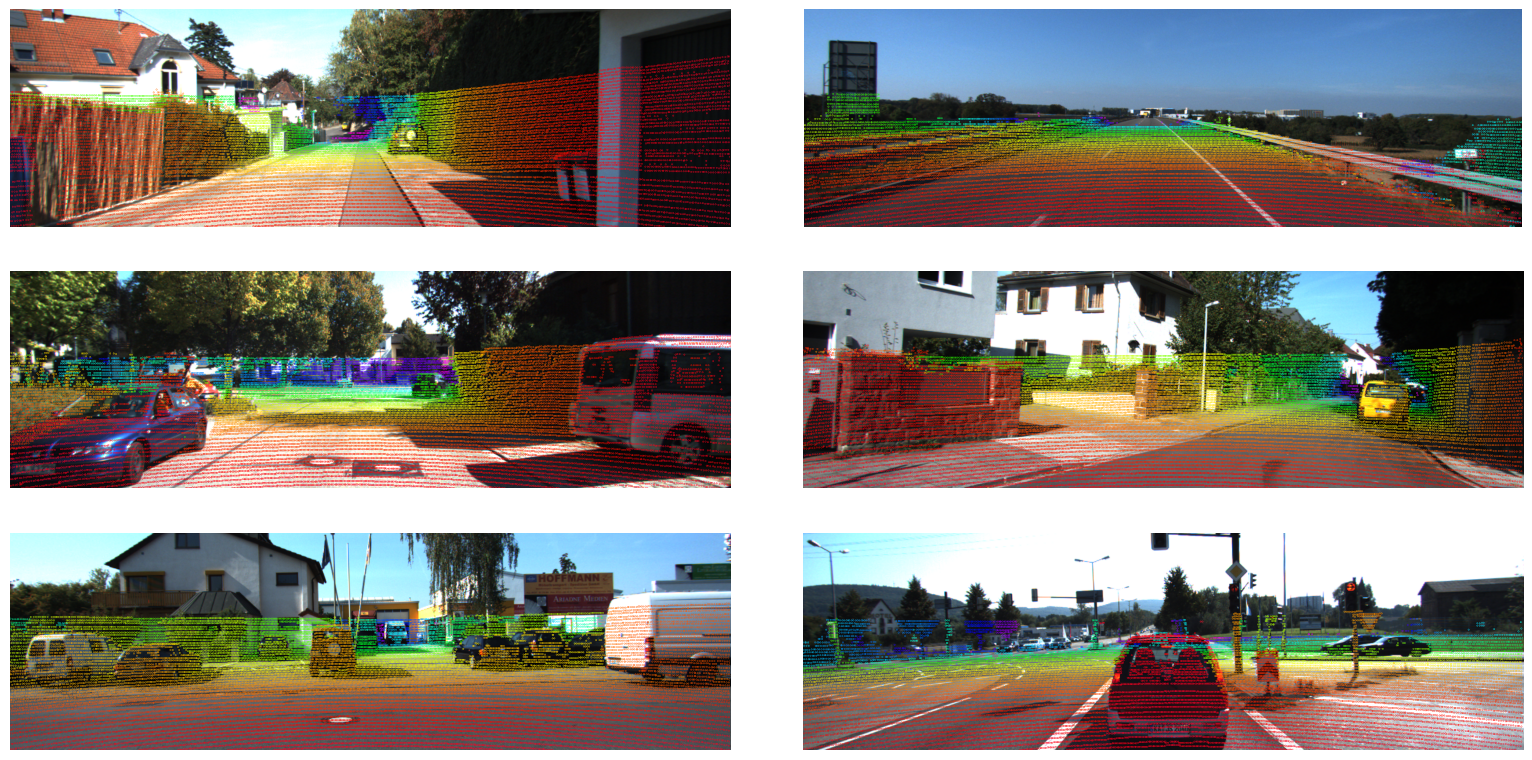

In [22]:
indices = random.choices(range(len(dataset)), k=6)
fig, axes = plt.subplots(3, 2, figsize=(16, 8))
plt.tight_layout()
for i in range(6):
    image, depth_map, valid_mask, overlap_mask = dataset[indices[i]]

    image = image[0].permute(1, 2, 0).numpy()
    depth_map = depth_map[0, 0].numpy()

    yy, xx = np.nonzero(depth_map)

    axes[i // 2, i % 2].axis("off")
    axes[i // 2, i % 2].imshow(image)
    axes[i // 2, i % 2].scatter(xx, yy, c=depth_map[yy, xx], s=0.05,cmap="gist_rainbow")

plt.show()